# 💻 Håndtering av filstier

Når man jobber med data, er det viktig å holde oversikt over hvor hvilke input-filer er lagret, og hvor hvilke output-filer skal skrives. Dette er spesielt viktig når man flytter mellom datamaskiner eller mellom virtuelle maskiner. Bruker man et distribuert kodeoppbevaring- eller versjoneringssystem, som GitHub, legges det til et ekstra lag med kompleksitet: filstier bør ofte være *relative* til git-repoet, eller til den gjeldende filen, siden repositoriet kan klones til hvilken som helst plassering på en annen datamaskin (og bare et annet brukernavn på skole- og personlige datamaskiner kan ødelegge ting).

Tidligere har filstier ofte vært hardkodede strenger, tekstverdier. Hvis for eksempel et utdatafilnavn måtte avledes fra et inndatafilnavn, ble alle slag av slicing og andre strengmanipulasjonsmetoder brukt. Mer nylig har `os.path`-modulen i Python blitt populær, som tillater å splitte en sti i kataloger, og filnavn i grunnnavn og filetternavn. I midlertid krever manipulering av filstier fortsatt kunnskap om den datamaskinen et skript til slutt skal kjøre på. For eksempel, på alle Unix-baserte operativsystemer, som Linux eller MacOS, er kataloger adskilt med skråstreker (`/`), mens Microsoft Windows bruker bakoverstreker (`\`) (dette spesielle problemet kan omgås med `os.sep` og `os.path.join`, men ikke på en veldig praktisk måte).

Siden Python 3.4 (så, ganske nylig), eksisterer det en innebygd modul som letter mye av problemene med å håndtere filstier: [`pathlib`](https://docs.python.org/3/library/pathlib.html). Den gir et abstrakt lag på toppen av de faktiske operativsystemets filstier som er konsistent mellom datamaskiner. Et `pathlib.Path()`-objekt kan initieres med en filsti (som en `str`), når den opprettes uten et argument, refererer den til katalogen til skriptet eller Notebook-filen.

In [10]:
import pathlib
pathlib.Path()

PosixPath('.')

Så langt er denne stien ikke sjekket mot den faktiske katalogstrukturen, men vi kan bruke `resolve()` for å konvertere den til en absolutt sti:

In [11]:
path = pathlib.Path()
path = path.resolve()
path

PosixPath('/workspaces/gmgi221/content/notebooks')

:::{note}

Denne stien er nå utvidet for å gjenspeile katalogstrukturen til datamaskinen den ble kjørt på. Mest sannsynlig har kopien du leser akkurat nå blitt generert på [github.io](https://github.io/) servere, og *‘nåværende arbeidskatalog’* er på et sted du ikke forventet.
:::

Dette stiobjektet har nå en rekke egenskaper og metoder. For eksempel kan vi teste om stien eksisterer i filsystemet, eller om den er en katalog:

In [12]:
path.exists()

True

In [13]:
path.is_dir()

True

Vi kunne også omdøpe eller slette stien (men la oss ikke gjøre dette med kursinnholdet!):

In [14]:
# path.rename("new name")

# path.unlink()  # delete if path is a file
# path.rmdir()  # delete if path is a directory

Endelig, for å traversere innenfor denne stien, trenger du ikke å tenke på om du kjører skriptet på Windows eller Linux, og du trenger definitivt ikke å bruke strengmanipulasjon. For å henvise til en mappe `data` i samme katalog som denne notatboken, bruk `/` (divisjonsoperatøren) for å legge til en annen stikomponent (kan være en streng). For eksempel, for å henvise til en mappe `data` innenfor samme katalog som denne Notebooken, skriv følgende:

In [15]:
data_mappe = path / "data"
data_mappe

PosixPath('/workspaces/gmgi221/content/notebooks/data')

For å henvise til ‘en katalog opp’ fra en sti, bruk dens `.parent`-egenskap:

In [16]:
path.parent

PosixPath('/workspaces/gmgi221/content')

`Path()`-objekter kan brukes (nesten) hvor som helst en filsti forventes som en variabel av typen `str`, da den automatisk *typecaster* (konverterer) seg selv til en passende type.

I data science-prosjekter er det en god vane å definere en konstant i begynnelsen av hver notatbok som peker på datamappen, eller flere konstanter for å peke på, for eksempel, inngangs- og utgangsmapper. I dagens øvelser bruker vi forskjellige prøvedatasett fra filer lagret i samme *datamappe*. Øverst i notatbøkene definerer vi derfor en konstant `DATA_MAPPE` som vi senere kan bruke til å finne prøvedatasettfilene:

In [17]:
# location (directory) of the notebook
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_MAPPE = NOTEBOOK_PATH / "data"

<Axes: >

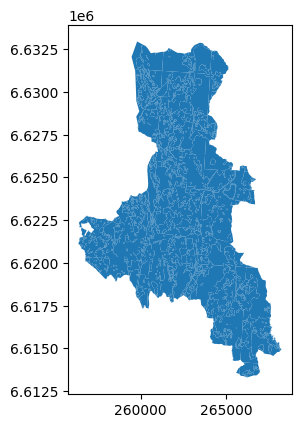

In [18]:
# this can then be used, for instance, in `geopandas.read_file()` (see next section):
import geopandas
data_set = geopandas.read_file(DATA_MAPPE / "arealdekke" / "ArealdekkeN50.gpkg")
data_set.plot()

:::{admonition} Konstanter?
:class: note

*Konstanter* er verdier som ikke kan endres når de er definert. Dette hjelper med å optimere programmets hastighet og minneavtrykk, og lar også programmereren stole på at en konstant har en gyldig verdi.

Python kjenner ikke konseptet med en konstant, per se. Imidlertid er det en konvensjon å behandle variabler med navn med kun store bokstaver som konstanter (at de ikke skal endres).
:::

:::{caution}

I eksemplene ovenfor brukte vi en sti hvor vi brukte `resolve()` tidligere. Dette forbedrer ytterligere kompatibilitet og konsistens mellom operativsystemer og lokale installasjoner.

Spesielt når du bruker stien til den gjeldende filen (som i `pathlib.Path()` uten parametere), anbefaler vi å løse stien før du går inn i noen annen katalog.
:::